In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('https://github.com/datasciencedojo/datasets/raw/master/titanic.csv')

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df['Sex'] = df.apply(lambda row:int(row['Sex']=='male'),axis=1)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']
target = ['Survived']

In [35]:
df = df.dropna(subset = features+target)
x_tr,x_va,y_tr,y_va = train_test_split(df[features],df[target],test_size = 0.4,random_state=0)
x_va,x_te,y_va,y_te = train_test_split(x_va,y_va,test_size = 0.5,random_state=0)
# make and fit a tree to training data, evaluation on validation set
tr = DecisionTreeClassifier(random_state = 0)
tr.fit(x_tr,y_tr)

0.6923076923076923
0.9906542056074766


In [ ]:
# our tree is overfit!!
print(tr.score(x_va,y_va))
print(tr.score(x_tr,y_tr))

In [37]:
print(tr.get_n_leaves())

99


In [42]:
# the main parameter we have to control tree overfit is max_depth
tr = DecisionTreeClassifier(max_depth = 2,random_state = 0)
tr.fit(x_tr,y_tr)
print(tr.score(x_tr,y_tr))
print(tr.score(x_va,y_va))
# amazing, with just ONE QUESTION our accuracy was improved over the unrestricted, overfit model.

0.8154205607476636
0.7902097902097902


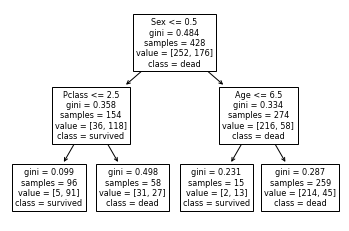

In [46]:
# what was that one question?
plot_tree(tr,feature_names = features,class_names = ['dead','survived']);

In [47]:
# iterate over all max_depths
acc_tr = []
acc_va = []
for i in range(1,18):
    tr = DecisionTreeClassifier(max_depth = i,random_state = 0)
    tr.fit(x_tr,y_tr)
    acc_tr.append(tr.score(x_tr,y_tr))
    acc_va.append(tr.score(x_va,y_va))

In [52]:
# now do for entropy
acc_tr_ent = []
acc_va_ent = []
for i in range(1,18):
    tr = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = 0)
    tr.fit(x_tr,y_tr)
    acc_tr_ent.append(tr.score(x_tr,y_tr))
    acc_va_ent.append(tr.score(x_va,y_va))

In [48]:
import matplotlib.pyplot as plt

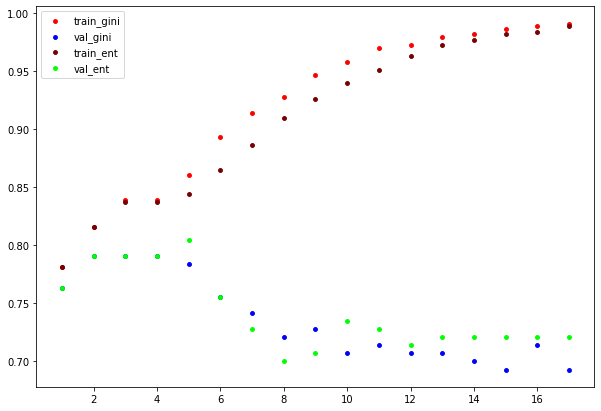

In [61]:
dotsize = 15
fig,ax = plt.subplots(figsize = (10,7))
ax.scatter(range(1,18),acc_tr,color = '#FF0000',label = 'train_gini',s=dotsize)
ax.scatter(range(1,18),acc_va,color = '#0000FF',label = 'val_gini',s=dotsize)
ax.scatter(range(1,18),acc_tr_ent,color = '#770000',label = 'train_ent',s=dotsize)
ax.scatter(range(1,18),acc_va_ent,color = '#00FF00',label = 'val_ent',s=dotsize)
ax.legend();

In [63]:
# criterion = 'entropy', max_depth = 5 is the winner. try on the test set
tr = DecisionTreeClassifier(max_depth = 5,criterion = 'entropy',random_state = 0)
tr.fit(x_tr,y_tr)
print(tr.score(x_te,y_te))

0.7832167832167832
